## GOALS OF THE NOTEBOOK

In this repo I want to try and create a relational map of a movie database based on the information parsed from the database. First dataset we will use is a more limited set. However, later we will go through a Netflix dataset that we have generated. The end goal should be two fully fleshed out dendrograms. This will largely be demonstrating the python data analysis, statistics, and machine learning tools and technology I have been self learning.

The datasets we will be using are a mash of sets found from Kaggle, Github, and Datacamp.

In [22]:
# Import modules
import numpy as np
import pandas as pd
import nltk
import ipytest
ipytest.autoconfig()

# Set seed for reproducibility
np.random.seed(5)

# Read in IMDb and Wikipedia movie data (both in same file)
movies_df = pd.read_csv("datasets/movies.csv")

print("Number of movies loaded: %s " % (len(movies_df)))

# Save a copy for testing purposes
test_df = movies_df.copy()

# Test got full length of movies data set
def test_movies():
    assert len(test_df) == 100

# Test got all columns of movies data set
def test_shape():
    assert test_df.shape == (100, 5)
# Display the data
movies_df


Number of movies loaded: 100 


,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc..."
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin..."


Now we need to be able to get somewhat of a combined plot between the two plots (imdb and wikipedia) which will give us a more objective plot description, parsing out the tonal words that are present in both and leaving behind only the most pertinent information.

First, that means we have to create an overall combined item. We can do this by creating a new column that contains both descriptions in their raw state.

In [23]:
# Combine wiki_plot and imdb_plot into a single column
movies_df["plot"] = movies_df["wiki_plot"].astype(str) + "\n" + movies_df["imdb_plot"].astype(str)

# Inspect the new DataFrame
movies_df.head()

# Check that the shape has changed
def test_shape2():
    assert movies_df.shape == (100, 6)
# Check that the new column is named properly
def test_has_plot():
    assert "plot" in movies_df.columns

ipytest.run('-vv')


======================================= test session starts ========================================
platform linux -- Python 3.9.4, pytest-7.4.4, pluggy-1.3.0 -- /home/bobarn/.pyenv/versions/3.9.4/bin/python
cachedir: .pytest_cache
rootdir: /home/bobarn/appacademy/DS_Projects/Related_Movies
collecting ... collected 6 items

t_c3b28cacb7944125a474aa4c09e74418.py::test_movies PASSED                                    [ 16%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_shape PASSED                                     [ 33%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_shape2 PASSED                                    [ 50%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_has_plot PASSED                                  [ 66%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_stemming PASSED                                  [ 83%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_tfidf PASSED                                     [100%]

======================================== 6 passed in 0.07s =============

<ExitCode.OK: 0>

At this point, now that we have the combined description we can start to use the nltk package to tokenize the descriptions, separating them into the individual words and phrases like we wanted. The `nltk.tokenize` along with the regex package will allow us to parse out the words and parts separated by spaces and punctuation.

Additionally, we can import the `nltk.stem.snowball` package so that we can create a stemming object. The stemming object should be set to English in our case because we are using an English dataset.

In [24]:
import re
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):

    # Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]

    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]

    return stems

# Removes all of what it determines as the excess or noise from the text, keeps only the very root of the words and returns them in a list
words_stemmed = tokenize_and_stem("It's 1941, and newspaper tycoon Charles Foster Kane (Orson Welles, who also directed and co-wrote the script) is dead")

print(words_stemmed)

def test_stemming():
    assert words_stemmed == ['it', "'s", 'and', 'newspap', 'tycoon', 'charl', 'foster', 'kane', 'orson', 'well', 'who', 'also', 'direct', 'and', 'co-wrot', 'the', 'script', 'is', 'dead']

ipytest.run('-vv')

['it', "'s", 'and', 'newspap', 'tycoon', 'charl', 'foster', 'kane', 'orson', 'well', 'who', 'also', 'direct', 'and', 'co-wrot', 'the', 'script', 'is', 'dead']
======================================= test session starts ========================================
platform linux -- Python 3.9.4, pytest-7.4.4, pluggy-1.3.0 -- /home/bobarn/.pyenv/versions/3.9.4/bin/python
cachedir: .pytest_cache
rootdir: /home/bobarn/appacademy/DS_Projects/Related_Movies
collecting ... collected 6 items

t_c3b28cacb7944125a474aa4c09e74418.py::test_movies PASSED                                    [ 16%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_shape PASSED                                     [ 33%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_shape2 PASSED                                    [ 50%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_has_plot PASSED                                  [ 66%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_stemming PASSED                                  [ 83%]
t_c3b28cacb794

<ExitCode.OK: 0>

Next we will want to add weight to certain words based on frequency and uniqueness across documents. To do this we can use the Term Frequency - Inverse Document Frequency Vectorizer. What that means is that it will check the frequency of a term, increasing the weight but then reduce the weight of the term if it is found in several documents. This will allow us to find the most key terms like character names and thematic language as well as overlook the fluff words like "the" and "and" and other general structural words in a sentence.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

<p>Once we establish a TF-IDF Vectorizer, we must modify the text to fit into the corresponding numeric form of the data which the computer will be able to understand and derive meaning from. To do this, we can call the <code>fit_transform()</code> method of the <code>TfidfVectorizer</code> object. </p>
<p>In doing this process, we also set the <code>stop_words</code> parameter to 'english' so that the words that are dropped in the evaluation of the weight of the words are the words included in a set list of words in the nltk module.</p>

In [26]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies_df["plot"]])

print(tfidf_matrix.shape)

def test_tfidf():
    assert tfidf_matrix.shape[0] == (100)

ipytest.run('-vv')

/home/bobarn/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/bobarn/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor',

(100, 564)
======================================= test session starts ========================================
platform linux -- Python 3.9.4, pytest-7.4.4, pluggy-1.3.0 -- /home/bobarn/.pyenv/versions/3.9.4/bin/python
cachedir: .pytest_cache
rootdir: /home/bobarn/appacademy/DS_Projects/Related_Movies
collecting ... collected 6 items

t_c3b28cacb7944125a474aa4c09e74418.py::test_movies PASSED                                    [ 16%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_shape PASSED                                     [ 33%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_shape2 PASSED                                    [ 50%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_has_plot PASSED                                  [ 66%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_stemming PASSED                                  [ 83%]
t_c3b28cacb7944125a474aa4c09e74418.py::test_tfidf PASSED                                     [100%]

======================================== 6 passed in 0.08s ==

<ExitCode.OK: 0>

<p>To determine how closely one movie is related to the other by the help of unsupervised learning, we can use clustering techniques to group the movies into groups based on similarities. In our case, we will use the movie genre to form our clusters.</p>

<p>We will use K-means, an algorithm which helps us to implement clustering in Python, which splits the set into a "K" amount of clusters based on the mean values.</p>

<p>To combine with this, we will be using the cosine similarity angle to determine the closeness of relationship between two movies. To do this we calculate the similarity distance by using the formula <code>similarity_distance = 1 - cosine_similarity_angle</code></p>

In [27]:
# Import k-means to perform clustering
from sklearn.cluster import KMeans

# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
movies_df["cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
movies_df['cluster'].value_counts()

similarity_distance = 1 - cosine_similarity(tfidf_matrix)

<p>Now that we have the similarities calculated properly, we can use pyplot and scipy to create our dendrogram using the cluster and similarity distances to group the movies and display them appropriately distanced from each other.</p>

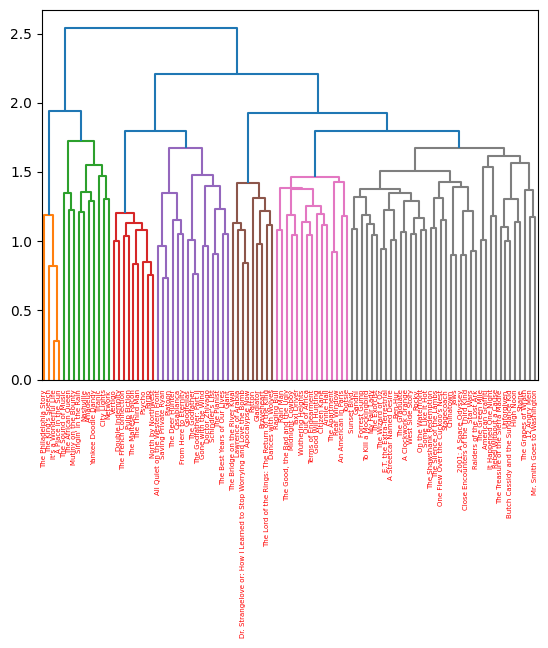

In [28]:
import matplotlib.pyplot as plt

# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(similarity_distance, method='complete')

dendrogram = dendrogram(mergings, labels=[x for x in movies_df["title"]], leaf_rotation=90)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]

plt.show()